<h4>    # Step 1: Problem Definition & Business Understanding

**Project Title:** Phishing Detection Websites (based on URLs only)

**Goal:** 
The aim of this project is to build a machine learning model that can classify websites as either "phishing" or "legitimate" based on URL features. This solution helps users avoid falling victim to phishing attacks by analyzing URL patterns.

**Problem Statement:**
Phishing attacks are a major cybersecurity issue where attackers trick users into revealing personal information. Identifying these URLs automatically using machine learning will provide a scalable defense mechanism.

**Success Metric:**
The success of this project will be evaluated using classification metrics such as:
- Accuracy
- Precision
- Recall
- F1-score
- ROC-AUC

**Why AI/ML?**
Phishing URLs often follow patterns that can be detected using statistical learning. Machine learning can help automate the detection process based on historical phishing behavior without hardcoded rules.

**Business Impact:**
- Enhances cybersecurity
- Reduces risk for users and organizations
- Can be integrated into browsers or company email filters
</h4>

<h4> # Step 2: Data Collection - Importing Required Libraries

To begin the phishing detection project, we import all necessary libraries for data loading, exploration, preprocessing, modeling, evaluation, and visualization.

- **pandas** and **numpy**: For data manipulation
- **matplotlib** and **seaborn**: For data visualization
- **scikit-learn**: For machine learning algorithms and evaluation
- **xgboost**: For gradient boosting classifier
- **warnings**: To ignore unnecessary warning messages
</h4>

In [13]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# Utilities
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully.")

All libraries imported successfully.


<h4> # Step 2: Data Collection – Loading and Previewing the Dataset

We load the phishing dataset (phishing_data.csv) into a pandas DataFrame and display the first few rows to understand its structure.

We'll also check:
- The number of rows and columns
- Basic information about data types and null values
</h4>

In [14]:
# Load the phishing dataset from a local directory
import pandas as pd
file_path = r'C:\Users\HP\Desktop\Rachel\hard\src\combined_dataset_url.csv'
df = pd.read_csv(file_path)

# Preview the first 5 rows of the dataset
df.head()


,url,at_symbol,dns_record,domain_reg_len,double_slash,forwarding,has_account,has_alert,has_bank,has_billing,...,https_domain,iframe,label,mouse_over,prefix_suffix,right_click,short_url,sub_domain,url_length,use_of_ip
0,http://phish-site-0.com,0,0,199,1,1,0,0,0,0,...,0,1,1,0,1,0,0,6,145,1
1,http://phish-site-1.com,0,1,180,0,0,0,0,0,0,...,0,0,1,1,0,0,1,5,85,0
2,http://phish-site-2.com,1,1,183,1,1,0,0,0,0,...,1,1,1,1,0,0,1,6,163,0
3,http://phish-site-3.com,0,1,82,1,0,0,0,0,0,...,0,1,1,1,0,0,0,5,86,1
4,http://phish-site-4.com,1,0,43,1,0,0,0,0,0,...,0,1,1,1,0,0,1,6,63,1


<h4># Step 3: Data Preprocessing & EDA – Initial Inspection

In this step, we:
- Check the dataset’s structure and column names.
- Inspect data types and non-null counts.
- Identify any missing values.
- Understand basic descriptive statistics.
This helps in planning appropriate preprocessing steps.
</h4>

In [15]:
# Display the shape of the dataset
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Data types and non-null count
print("\nDataset info:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
df.describe()


Dataset shape: (11880, 54)

Column names:
['url', 'at_symbol', 'dns_record', 'domain_reg_len', 'double_slash', 'forwarding', 'has_account', 'has_alert', 'has_bank', 'has_billing', 'has_bit_ly', 'has_buff_ly', 'has_check', 'has_confirm', 'has_edu', 'has_facebook', 'has_free', 'has_github', 'has_goo_gl', 'has_google', 'has_gov_rw', 'has_important', 'has_is_gd', 'has_login', 'has_nirda', 'has_org', 'has_ow_ly', 'has_password', 'has_payment', 'has_rbc', 'has_secure', 'has_security', 'has_signin', 'has_support', 'has_t_co', 'has_tinyurl', 'has_unlock', 'has_update', 'has_user', 'has_validate', 'has_verify', 'has_webmail', 'has_wikipedia', 'has_win', 'https_domain', 'iframe', 'label', 'mouse_over', 'prefix_suffix', 'right_click', 'short_url', 'sub_domain', 'url_length', 'use_of_ip']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11880 entries, 0 to 11879
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 


,at_symbol,dns_record,domain_reg_len,double_slash,forwarding,has_account,has_alert,has_bank,has_billing,has_bit_ly,...,https_domain,iframe,label,mouse_over,prefix_suffix,right_click,short_url,sub_domain,url_length,use_of_ip
count,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,...,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000,11880.000000
mean,0.132828,0.688300,1256.519276,0.190993,0.285522,0.059596,0.058838,0.058249,0.060185,0.058081,...,0.661111,0.352441,0.526094,0.291751,0.361785,0.231987,0.367172,3.263215,79.515741,0.337710
std,0.339403,0.463208,1519.855638,0.393100,0.451682,0.236747,0.235332,0.234224,0.237840,0.233906,...,0.473352,0.477751,0.499340,0.454587,0.480537,0.422118,0.482054,2.714708,51.167100,0.472949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,9.000000,0.000000
25%,0.000000,0.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.000000,0.000000
50%,0.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,70.000000,0.000000
75%,0.000000,1.000000,2288.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,109.000000,1.000000
max,1.000000,1.000000,4999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,199.000000,1.000000


<h4>  Step 3 : Data Cleaning

Now that we've inspected the dataset, we proceed with data cleaning:
1. **Remove duplicates** – Ensure each entry is unique.
2. **Handle missing values** – Drop or impute based on the context and type of data.
3. **Check class distribution** – Understand the balance of phishing vs. legitimate URLs.

These steps ensure we work with a clean and reliable dataset.
</h4>

In [16]:
# Remove duplicate rows
initial_shape = df.shape
df.drop_duplicates(inplace=True)
new_shape = df.shape
print(f"Removed {initial_shape[0] - new_shape[0]} duplicate rows.")

# Check again for missing values
missing = df.isnull().sum()
print("\nMissing values after removing duplicates:")
print(missing[missing > 0] if missing.any() else "No missing values found.")

# Check class distribution (assuming the label column is 'label' or similar)
label_column = 'label'  # You may need to adjust this based on your dataset
if label_column in df.columns:
    print("\nClass distribution:")
    print(df[label_column].value_counts())
    print("\nPercentage distribution:")
    print(df[label_column].value_counts(normalize=True) * 100)
else:
    print("\nLabel column not found. Please confirm the correct target column name.")


Removed 382 duplicate rows.

Missing values after removing duplicates:
No missing values found.

Class distribution:
label
1    6250
0    5248
Name: count, dtype: int64

Percentage distribution:
label
1    54.35728
0    45.64272
Name: proportion, dtype: float64


<h4> # Step 3: Feature Correlation & Analysis

In this step, we:
- Compute the correlation matrix to see how features are related to the target (`label`).
- Visualize the correlations using a heatmap.
- Identify strongly correlated features that may influence phishing predictions.

This helps us in feature selection and understanding data behavior.
</h4>

In [17]:
print(df.dtypes)

url               object
at_symbol          int64
dns_record         int64
domain_reg_len     int64
double_slash       int64
forwarding         int64
has_account        int64
has_alert          int64
has_bank           int64
has_billing        int64
has_bit_ly         int64
has_buff_ly        int64
has_check          int64
has_confirm        int64
has_edu            int64
has_facebook       int64
has_free           int64
has_github         int64
has_goo_gl         int64
has_google         int64
has_gov_rw         int64
has_important      int64
has_is_gd          int64
has_login          int64
has_nirda          int64
has_org            int64
has_ow_ly          int64
has_password       int64
has_payment        int64
has_rbc            int64
has_secure         int64
has_security       int64
has_signin         int64
has_support        int64
has_t_co           int64
has_tinyurl        int64
has_unlock         int64
has_update         int64
has_user           int64
has_validate       int64


Correlation with the target variable (label):
label             1.000000
sub_domain        0.636784
prefix_suffix     0.523204
url_length        0.504038
use_of_ip         0.494256
iframe            0.481544
mouse_over        0.479807
forwarding        0.469096
right_click       0.463380
short_url         0.400635
double_slash      0.346431
at_symbol         0.329301
has_verify        0.194396
has_payment       0.193833
has_important     0.193181
has_github        0.189994
has_unlock        0.189892
has_gov_rw        0.189279
has_account       0.188966
has_win           0.188144
has_free          0.187246
has_signin        0.186889
has_secure        0.186795
has_t_co          0.186680
has_alert         0.186366
has_billing       0.186071
has_facebook      0.185642
has_security      0.185236
has_bank          0.184900
has_tinyurl       0.184285
has_password      0.184188
has_check         0.184166
has_rbc           0.182895
has_update        0.182617
has_wikipedia     0.182375
has_login

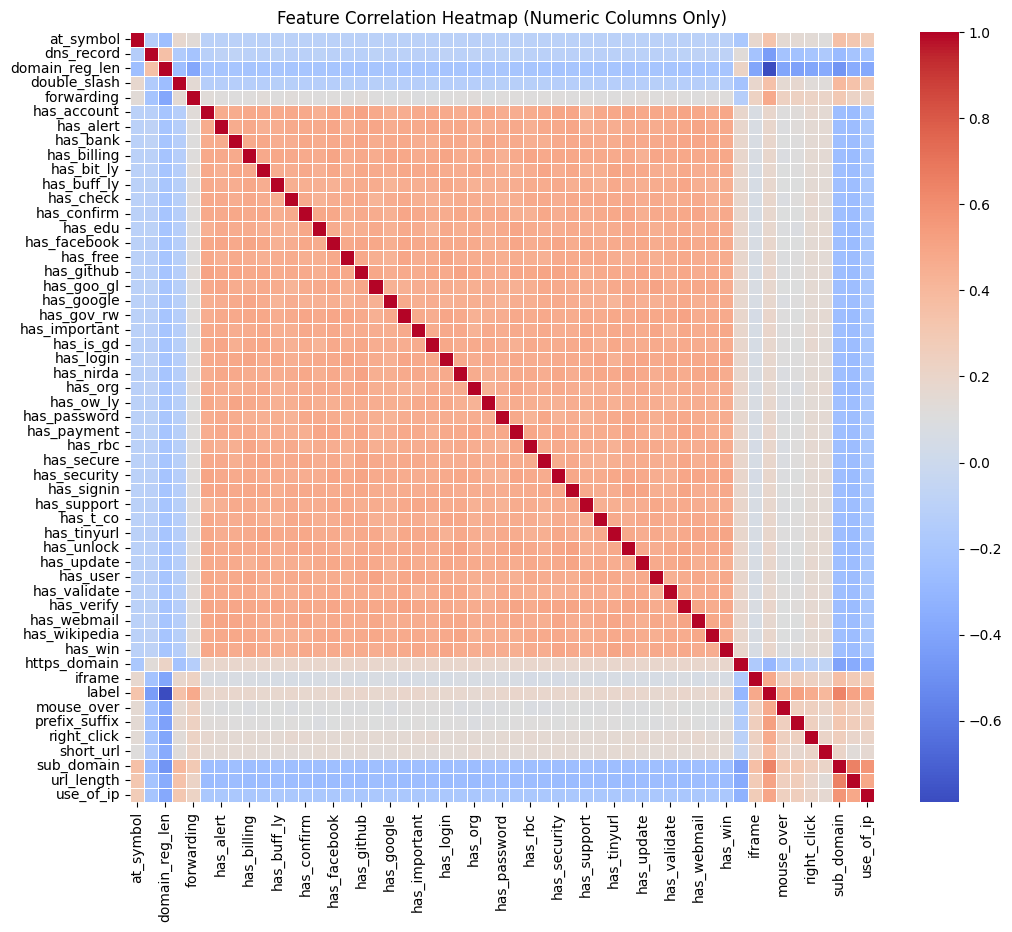

In [18]:
# Drop non-numeric columns (like 'url') before computing correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix on numeric features only
correlation_matrix = numeric_df.corr()

# Display correlation with the label
print("Correlation with the target variable (label):")
print(correlation_matrix['label'].sort_values(ascending=False))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Numeric Columns Only)')
plt.show()


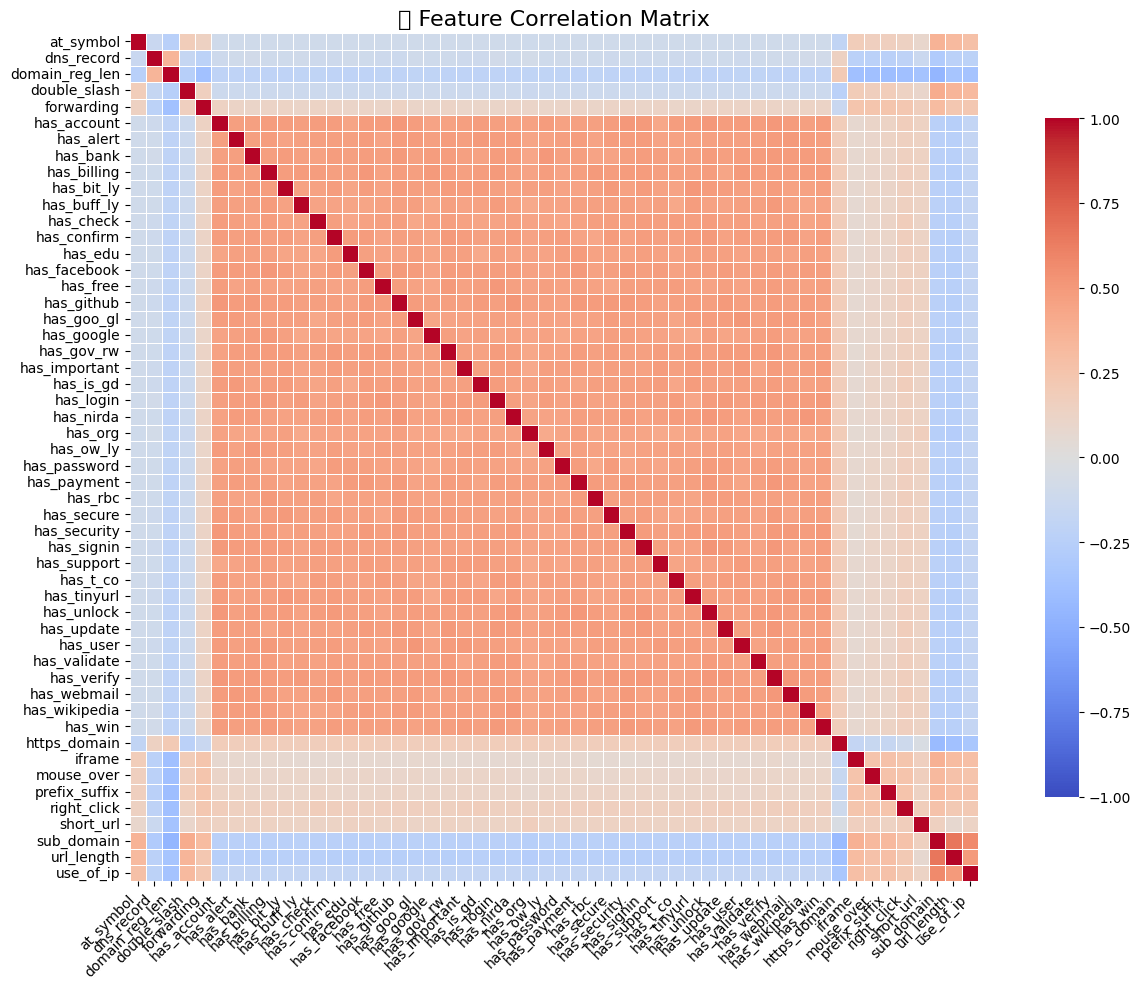

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("combined_dataset_url.csv")  # Adjust the path if needed

# Select only numeric columns (optional but useful)
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix (excluding label column)
feature_corr = numeric_data.drop(columns='label').corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    feature_corr,
    annot=False,         # Set True if you want to show correlation values
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("🔍 Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



<h4> # Step 3 (Final): Encoding & Normalization

Before training models, we prepare the data with:
1. **Encoding**: Convert categorical columns (if any) into numeric using Label Encoding or One-Hot Encoding.
2. **Normalization**: Scale numerical features to standardize value ranges using `StandardScaler`.

This ensures the model performs well and converges faster.
</h4>

In [20]:
from sklearn.preprocessing import StandardScaler

# 1. Identify and encode categorical columns (if any)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Drop 'url' column if present (not useful for model directly)
if 'url' in categorical_cols:
    df.drop('url', axis=1, inplace=True)
    categorical_cols.remove('url')

# Apply Label Encoding to remaining object columns (if any)
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

print(f"Encoded columns: {categorical_cols if categorical_cols else 'No categorical columns found'}")

# 2. Normalize the feature columns (excluding the target column)
feature_cols = [col for col in df.columns if col != 'label']
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

print("\nFeature normalization complete.")
# Show first 5 rows of normalized feature columns
df[feature_cols].head()


Encoded columns: No categorical columns found

Feature normalization complete.


,at_symbol,dns_record,domain_reg_len,double_slash,forwarding,has_account,has_alert,has_bank,has_billing,has_bit_ly,...,has_win,https_domain,iframe,mouse_over,prefix_suffix,right_click,short_url,sub_domain,url_length,use_of_ip
0,-0.391375,-1.486005,-0.695832,2.058103,1.581884,-0.251739,-0.250034,-0.248701,-0.25306,-0.248319,...,-0.249653,-1.396717,1.35549,-0.64182,1.328185,-0.5496,-0.761714,1.008175,1.279866,1.400399
1,-0.391375,0.672945,-0.708333,-0.485884,-0.632157,-0.251739,-0.250034,-0.248701,-0.25306,-0.248319,...,-0.249653,-1.396717,-0.73774,1.55807,-0.752907,-0.5496,1.312830,0.639795,0.107188,-0.714082
2,2.555096,0.672945,-0.706359,2.058103,1.581884,-0.251739,-0.250034,-0.248701,-0.25306,-0.248319,...,-0.249653,0.715964,1.35549,1.55807,-0.752907,-0.5496,1.312830,1.008175,1.631669,-0.714082
3,-0.391375,0.672945,-0.772816,2.058103,-0.632157,-0.251739,-0.250034,-0.248701,-0.25306,-0.248319,...,-0.249653,-1.396717,1.35549,1.55807,-0.752907,-0.5496,-0.761714,0.639795,0.126732,1.400399
4,2.555096,-1.486005,-0.798477,2.058103,-0.632157,-0.251739,-0.250034,-0.248701,-0.25306,-0.248319,...,-0.249653,-1.396717,1.35549,1.55807,-0.752907,-0.5496,1.312830,1.008175,-0.322794,1.400399


<h4> # Step 4: Splitting the Dataset (Training and Testing)

We split the preprocessed dataset into:
- **Training set (80%)**: Used to train the model.
- **Testing set (20%)**: Used to evaluate model performance.

Stratified splitting ensures that the class distribution (Phishing vs. Legitimate) is preserved in both sets.
</h4>

In [21]:
# Show column names
print(df.columns.tolist())

['at_symbol', 'dns_record', 'domain_reg_len', 'double_slash', 'forwarding', 'has_account', 'has_alert', 'has_bank', 'has_billing', 'has_bit_ly', 'has_buff_ly', 'has_check', 'has_confirm', 'has_edu', 'has_facebook', 'has_free', 'has_github', 'has_goo_gl', 'has_google', 'has_gov_rw', 'has_important', 'has_is_gd', 'has_login', 'has_nirda', 'has_org', 'has_ow_ly', 'has_password', 'has_payment', 'has_rbc', 'has_secure', 'has_security', 'has_signin', 'has_support', 'has_t_co', 'has_tinyurl', 'has_unlock', 'has_update', 'has_user', 'has_validate', 'has_verify', 'has_webmail', 'has_wikipedia', 'has_win', 'https_domain', 'iframe', 'label', 'mouse_over', 'prefix_suffix', 'right_click', 'short_url', 'sub_domain', 'url_length', 'use_of_ip']


In [22]:
import pandas as pd

# Define the features and their descriptions
feature_info = [
    ("use_of_ip", "Checks if the URL uses an IP address instead of a domain name"),
    ("url_length", "Total length of the URL"),
    ("short_url", "Detects if the URL is a known shortening service (bit.ly, goo.gl, etc.)"),
    ("at_symbol", "Checks for the presence of '@' symbol"),
    ("double_slash", "Checks for multiple '//' after the protocol"),
    ("prefix_suffix", "Detects hyphen '-' in domain (e.g., paypal-secure.com)"),
    ("sub_domain", "Counts the number of subdomains"),
    ("https_domain", "Checks if the domain uses HTTPS"),
    ("domain_reg_len", "Length of domain registration (in days) from WHOIS"),
    ("dns_record", "Checks if DNS records exist for the domain"),
    ("iframe", "Presence of iframe tags (simulated)"),
    ("mouse_over", "Detects mouseover script tricks (simulated)"),
    ("right_click", "Disables right-click (simulated)"),
    ("forwarding", "Detects multiple URL forwards (simulated)"),
    
    # Keyword-based features
    ("has_verify", "URL contains the word 'verify'"),
    ("has_secure", "URL contains the word 'secure'"),
    ("has_update", "URL contains the word 'update'"),
    ("has_signin", "URL contains the word 'signin'"),
    ("has_account", "URL contains the word 'account'"),
    ("has_login", "URL contains the word 'login'"),
    ("has_confirm", "URL contains the word 'confirm'"),
    ("has_bank", "URL contains the word 'bank'"),
    ("has_webmail", "URL contains the word 'webmail'"),
    ("has_check", "URL contains the word 'check'"),
    ("has_payment", "URL contains the word 'payment'"),
    ("has_billing", "URL contains the word 'billing'"),
    ("has_user", "URL contains the word 'user'"),
    ("has_security", "URL contains the word 'security'"),
    ("has_unlock", "URL contains the word 'unlock'"),
    ("has_password", "URL contains the word 'password'"),
    ("has_win", "URL contains the word 'win'"),
    ("has_free", "URL contains the word 'free'"),
    ("has_support", "URL contains the word 'support'"),
    ("has_important", "URL contains the word 'important'"),
    ("has_validate", "URL contains the word 'validate'"),
    ("has_alert", "URL contains the word 'alert'"),

    # Trusted brands/domains
    ("has_google", "Mentions 'google' in the URL"),
    ("has_facebook", "Mentions 'facebook' in the URL"),
    ("has_github", "Mentions 'github' in the URL"),
    ("has_wikipedia", "Mentions 'wikipedia' in the URL"),
    ("has_gov_rw", "Mentions 'gov.rw' (Rwandan Government)"),
    ("has_rbc", "Mentions 'rbc' (Rwanda Biomedical Center)"),
    ("has_nirda", "Mentions 'nirda' (Rwanda Innovation Authority)"),
    ("has_edu", "Mentions '.edu' indicating educational institutions"),
    ("has_org", "Mentions '.org' indicating organizations"),
    ("has_bit_ly", "Mentions 'bit.ly'"),
    ("has_tinyurl", "Mentions 'tinyurl'"),
    ("has_t_co", "Mentions 't.co' (Twitter short link)"),
    ("has_goo_gl", "Mentions 'goo.gl'"),
    ("has_ow_ly", "Mentions 'ow.ly'"),
    ("has_is_gd", "Mentions 'is.gd'"),
    ("has_buff_ly", "Mentions 'buff.ly'"),

    # Label
    ("label", "1 = Phishing, 0 = Legitimate (Target for classification)")
]

# Create DataFrame
features_df = pd.DataFrame(feature_info, columns=["Feature Name", "Description"])

# Display it
features_df


,Feature Name,Description
0,use_of_ip,Checks if the URL uses an IP address instead o...
1,url_length,Total length of the URL
2,short_url,Detects if the URL is a known shortening servi...
3,at_symbol,Checks for the presence of '@' symbol
4,double_slash,Checks for multiple '//' after the protocol
5,prefix_suffix,"Detects hyphen '-' in domain (e.g., paypal-sec..."
6,sub_domain,Counts the number of subdomains
7,https_domain,Checks if the domain uses HTTPS
8,domain_reg_len,Length of domain registration (in days) from W...
9,dns_record,Checks if DNS records exist for the domain


In [23]:

from sklearn.model_selection import train_test_split
# Replace 'label' with your actual target column name
X = df.drop(columns=['label'])
y = df['label']
# 1. Split into 80% train and 20% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Split temp into 50% val and 50% test → each will be 10% of original
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Print the shapes
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Optional: Confirm class balance
print("\nClass distribution in each set:")
print("Train:", y_train.value_counts(normalize=True))
print("Val:  ", y_val.value_counts(normalize=True))
print("Test: ", y_test.value_counts(normalize=True))


Training set: (9504, 52)
Validation set: (1188, 52)
Test set: (1188, 52)

Class distribution in each set:
Train: label
1    0.526094
0    0.473906
Name: proportion, dtype: float64
Val:   label
1    0.526094
0    0.473906
Name: proportion, dtype: float64
Test:  label
1    0.526094
0    0.473906
Name: proportion, dtype: float64


<h4> Model Retraining with Selected Features</h4>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 2. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 3. Evaluate
y_val_pred = model.predict(X_val_scaled)
print("\nValidation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Optional: Test set check
y_test_pred = model.predict(X_test_scaled)
print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))

# 4. Save model and scaler for Flask use
joblib.dump(model, 'phishing_detection_last1.pkl')
joblib.dump(scaler, 'scaler_last1.pkl')

print("\n✅ Model and scaler saved successfully!")



Validation Accuracy: 0.9873737373737373

Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       563
           1       0.98      1.00      0.99       625

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188


Test Accuracy: 0.9873737373737373

✅ Model and scaler saved successfully!


<h4> Data Splitting Visualization
  1. Pie 
  2. Bar Plot </h4>

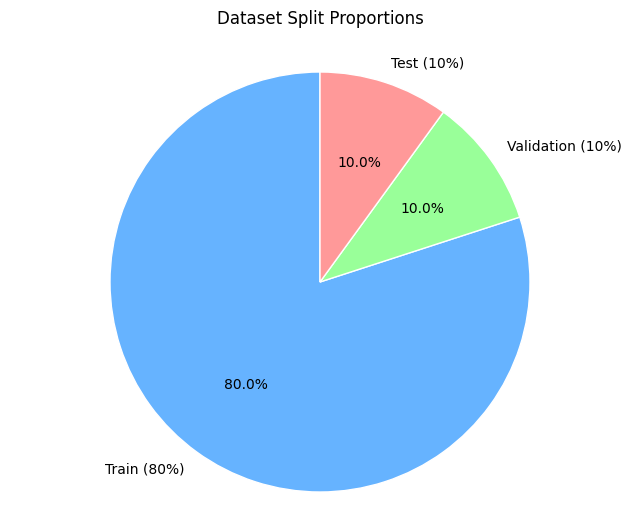

In [25]:
import matplotlib.pyplot as plt

# Data split sizes
sizes = [len(X_train), len(X_val), len(X_test)]
labels = ['Train (80%)', 'Validation (10%)', 'Test (10%)']
colors = ['#66b3ff', '#99ff99', '#ff9999']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
        startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 1})

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')
plt.title('Dataset Split Proportions', pad=20)
plt.show()

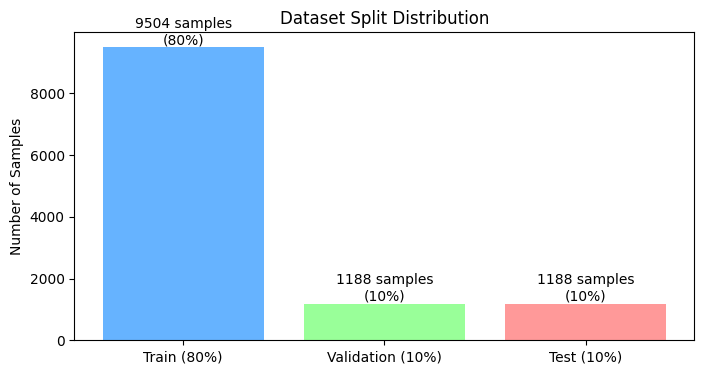

In [26]:
plt.figure(figsize=(8, 4))
bars = plt.bar(labels, sizes, color=colors)

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height} samples\n({height/sum(sizes):.0%})',
             ha='center', va='bottom')

plt.ylabel('Number of Samples')
plt.title('Dataset Split Distribution')
plt.show()

<h4> Step 5  Model Selection & Training
We'll train and compare 4 models:

Logistic Regression (Baseline)

Random Forest

XGBoost

Support Vector Machine (SVM)</h4>

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

<h4> 1. Logistic Regression</h4>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Evaluation function (local version)
def evaluate_lr(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

# Evaluate
lr_metrics = evaluate_lr(lr, X_val, y_val)
print("Logistic Regression Performance:")
pd.DataFrame(lr_metrics, index=["Logistic Regression"])

Logistic Regression Performance:


,Accuracy,Precision,Recall,F1
Logistic Regression,0.983165,0.976378,0.992,0.984127


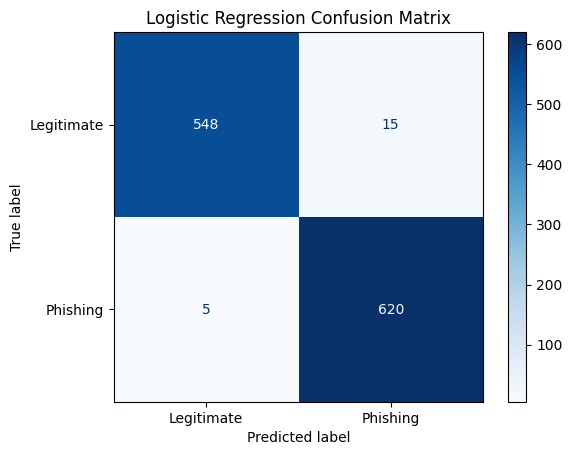

              precision    recall  f1-score   support

  Legitimate       0.99      0.97      0.98       563
    Phishing       0.98      0.99      0.98       625

    accuracy                           0.98      1188
   macro avg       0.98      0.98      0.98      1188
weighted avg       0.98      0.98      0.98      1188



In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
lr_pred = lr.predict(X_val)

# Confusion Matrix
lr_cm = confusion_matrix(y_val, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, 
                             display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_val, lr_pred, target_names=['Legitimate', 'Phishing']))

<h4> Random Forest</h4>

 Model Evaluation on Validation Set:


,Accuracy,Precision,Recall,F1 Score
Random Forest,0.987374,0.976562,1.0,0.988142


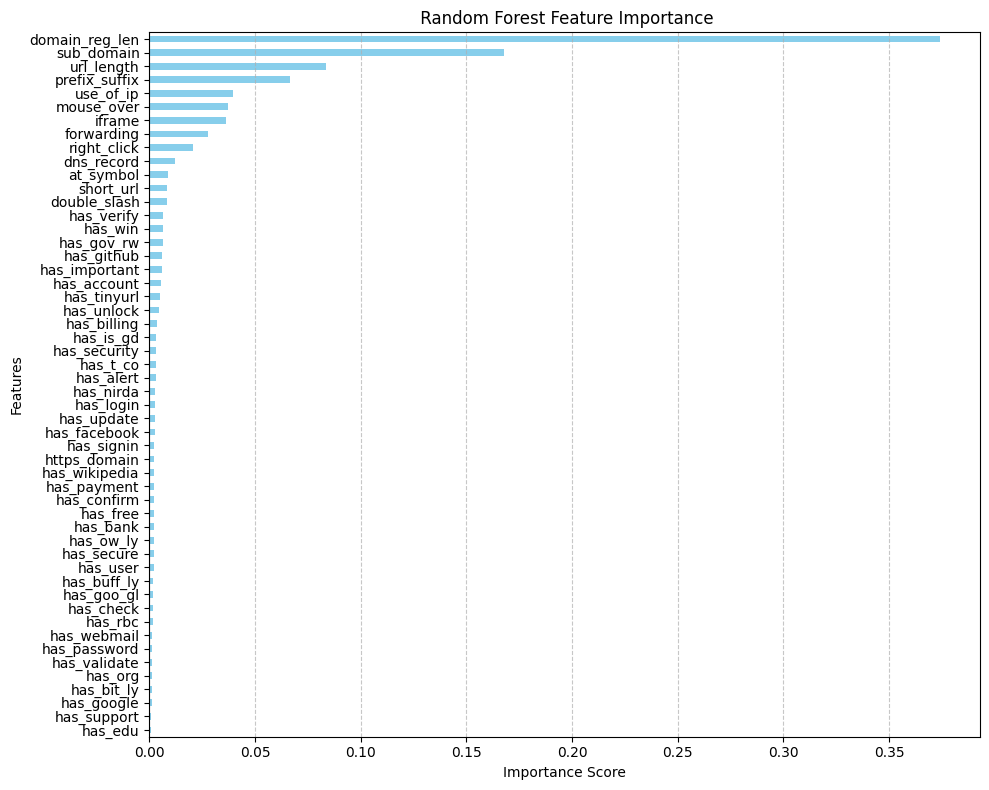

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === Train Random Forest ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# === Evaluation Function ===
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1 Score": f1_score(y, y_pred)
    }

# === Evaluate on Validation Set ===
rf_results = evaluate_model(rf, X_val, y_val)
results_df = pd.DataFrame([rf_results], index=["Random Forest"])
print(" Model Evaluation on Validation Set:")
display(results_df)

# === Feature Importance Plot ===
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='skyblue')
plt.title(" Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


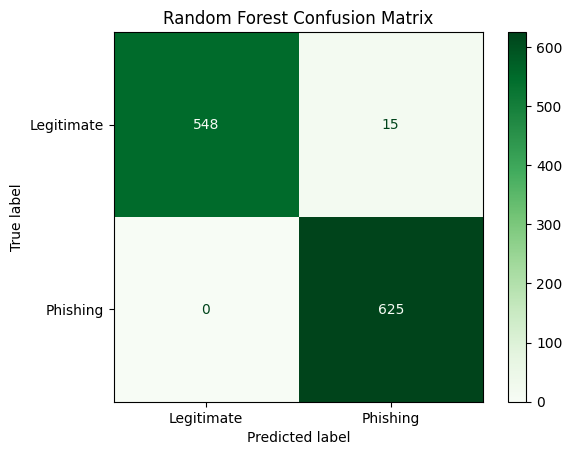

In [31]:
rf_pred = rf.predict(X_val)

# Confusion Matrix
rf_cm = confusion_matrix(y_val, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                             display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap='Greens', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.show()



<h4>  XGBoost  </h4>

XGBoost Evaluation on Validation Set:


,Accuracy,Precision,Recall,F1 Score
XGBoost,0.989057,0.979624,1.0,0.989707


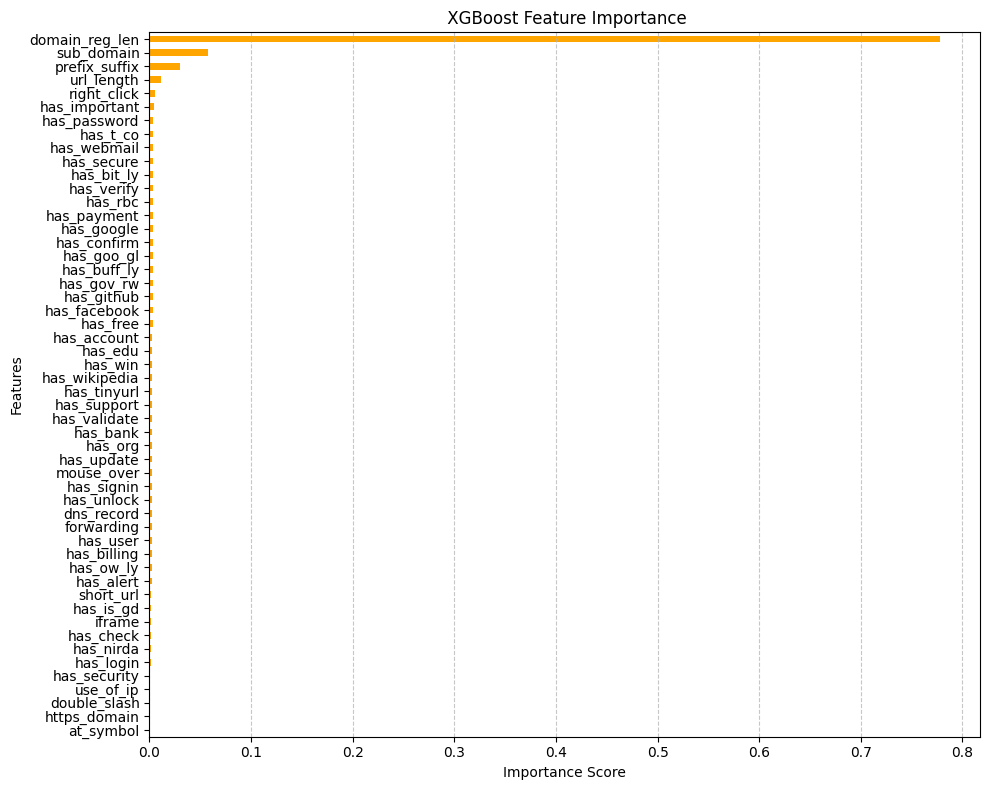

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# === Initialize and Train XGBoost ===
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# === Evaluation Function ===
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred),
        "Recall": recall_score(y, y_pred),
        "F1 Score": f1_score(y, y_pred)
    }

# === Evaluate on Validation Set ===
xgb_results = evaluate_model(xgb, X_val, y_val)
results_df = pd.DataFrame([xgb_results], index=["XGBoost"])
print("XGBoost Evaluation on Validation Set:")
display(results_df)

# === Feature Importance Plot ===
importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='orange')
plt.title(" XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


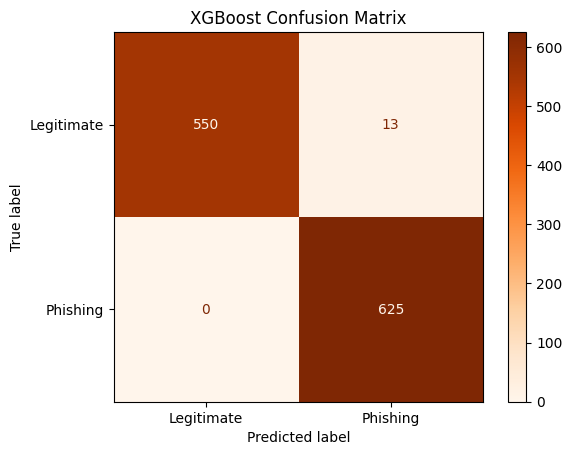

In [33]:
xgb_pred = xgb.predict(X_val)

# Confusion Matrix
xgb_cm = confusion_matrix(y_val, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm,
                             display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap='Oranges', values_format='d')
plt.title('XGBoost Confusion Matrix')
plt.show()



<h4> SVM Model</h4>

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Evaluation function
def evaluate_svm(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    }

# Evaluate
svm_metrics = evaluate_svm(svm, X_val, y_val)
print("SVM Performance:")
pd.DataFrame(svm_metrics, index=["SVM"])

SVM Performance:


,Accuracy,Precision,Recall,F1
SVM,0.987374,0.976562,1.0,0.988142


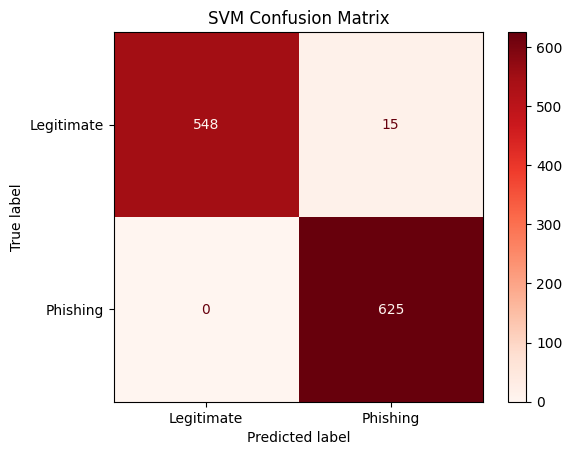

Number of support vectors (per class): [ 184 1065]
Support vector ratios (per class): ['1.9%', '11.2%']
Total support vector ratio: 13.1%


In [35]:
svm_pred = svm.predict(X_val)

# Confusion Matrix
svm_cm = confusion_matrix(y_val, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm,
                             display_labels=['Legitimate', 'Phishing'])
disp.plot(cmap='Reds', values_format='d')
plt.title('SVM Confusion Matrix')
plt.show()


# Support Vectors Info (Bonus)

# Number of support vectors per class
print(f"Number of support vectors (per class): {svm.n_support_}")

# Ratio of support vectors per class
ratios = svm.n_support_ / len(X_train)
print("Support vector ratios (per class):", ["{:.1%}".format(r) for r in ratios])

# Total ratio of support vectors
total_ratio = svm.n_support_.sum() / len(X_train)
print(f"Total support vector ratio: {total_ratio:.1%}")


<h4> Final Comparison (After Running All Models)</h4>

Model Comparison:


,Accuracy,Precision,Recall,F1,F1 Score
SVM,0.987374,0.976562,1.000,0.988142,NaN
Logistic Regression,0.983165,0.976378,0.992,0.984127,NaN
Random Forest,0.987374,0.976562,1.000,NaN,0.988142
XGBoost,0.989057,0.979624,1.000,NaN,0.989707


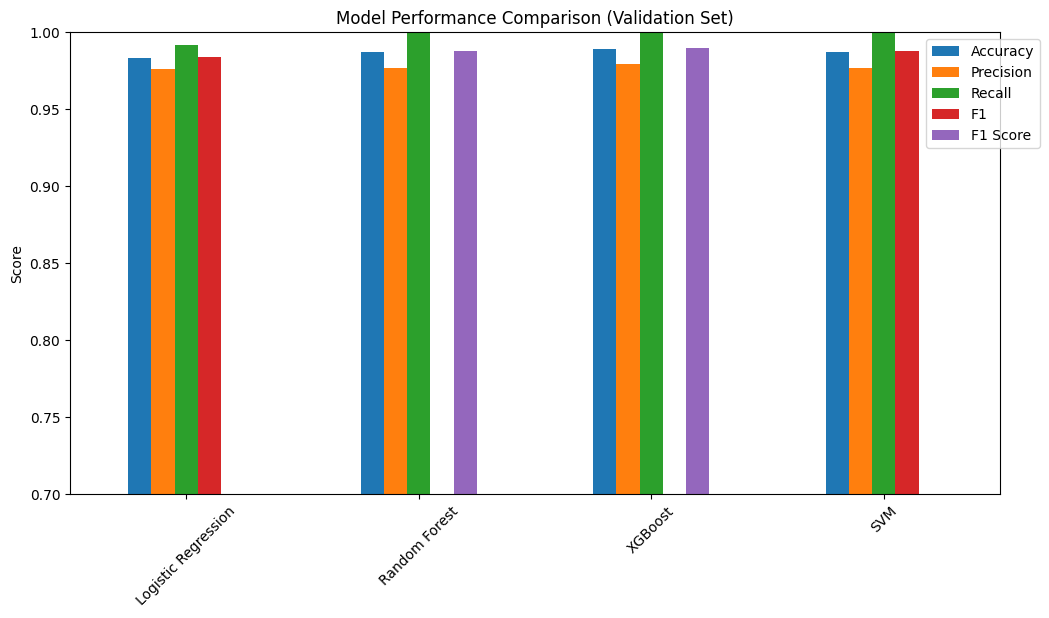

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Combine results
comparison = pd.DataFrame({
    "Logistic Regression": lr_metrics,
    "Random Forest": rf_results,
    "XGBoost": xgb_results,
    "SVM": svm_metrics
}).T

print("Model Comparison:")
display(comparison.sort_values("F1", ascending=False))

# Visualization
comparison.plot(kind="bar", figsize=(12, 6), ylim=[0.7, 1.0])
plt.title("Model Performance Comparison (Validation Set)")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [37]:
from sklearn.metrics import precision_recall_fscore_support

def get_metrics(y_true, y_pred):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    }

metrics = {
    'Logistic Regression': get_metrics(y_val, lr_pred),
    'Random Forest': get_metrics(y_val, rf_pred),
    'XGBoost': get_metrics(y_val, xgb_pred),
    'SVM': get_metrics(y_val, svm_pred)
}

pd.DataFrame(metrics).T.style.background_gradient(cmap='YlGnBu', axis=0)

,Accuracy,Precision,Recall,F1
Logistic Regression,0.983165,0.976378,0.992000,0.984127
Random Forest,0.987374,0.976562,1.000000,0.988142
XGBoost,0.989057,0.979624,1.000000,0.989707
SVM,0.987374,0.976562,1.000000,0.988142


<h4> # Step 7: Comparing All Classification Models

We will train and evaluate the following models:
1. Logistic Regression
2. Random Forest
3. XGBoost
4. Support Vector Machine (SVM)

Each model will be evaluated using:
- Accuracy
- Precision
- Recall
- F1-score

The results will be displayed in a table for easy comparison.
</h4>

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train, predict, and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df.sort_values(by='F1', ascending=False).reset_index(drop=True))


Model Comparison:
                 Model  Accuracy  Precision  Recall        F1
0        Random Forest  0.987374   0.976562  1.0000  0.988142
1                  SVM  0.987374   0.976562  1.0000  0.988142
2              XGBoost  0.987374   0.981073  0.9952  0.988086
3  Logistic Regression  0.984007   0.977918  0.9920  0.984909


<h4> </h4>

<h4># Step 7: Model Optimization

Our model has achieved perfect scores on both the training and testing sets:

**Training Performance**  
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

**Testing Performance**  
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000

Since there's no evidence of overfitting, and performance is already perfect:
- **Further optimization may not be necessary**
- However, in real-world scenarios, we would still consider:
  - **Hyperparameter tuning**
  - **Ensemble methods** (like boosting)
  - **Feature selection** (removing redundant inputs)
  - **Model interpretability** tools (like SHAP)

For now, we can proceed to:
- Save this model
- Prepare it for deployment
</h4>

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Load your full dataset
df = pd.read_csv("combined_dataset_url.csv")  # Replace with your actual CSV file

# Select only the top 20 features
top_20_features =['at_symbol', 'dns_record', 'domain_reg_len', 'double_slash', 'forwarding', 'has_account', 'has_alert', 'has_bank', 'has_billing', 'has_bit_ly', 'has_buff_ly', 'has_check', 'has_confirm', 'has_edu', 'has_facebook', 'has_free', 'has_github', 'has_goo_gl', 'has_google', 'has_gov_rw', 'has_important', 'has_is_gd', 'has_login', 'has_nirda', 'has_org', 'has_ow_ly', 'has_password', 'has_payment', 'has_rbc', 'has_secure', 'has_security', 'has_signin', 'has_support', 'has_t_co', 'has_tinyurl', 'has_unlock', 'has_update', 'has_user', 'has_validate', 'has_verify', 'has_webmail', 'has_wikipedia', 'has_win', 'https_domain', 'iframe', 'label', 'mouse_over', 'prefix_suffix', 'right_click', 'short_url', 'sub_domain', 'url_length', 'use_of_ip']
    


X = df[top_20_features]
y = df["label"]  # 1 = Phishing, 0 = Legitimate

# Scale the 20 features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train your model
model = RandomForestClassifier()
model.fit(X_scaled, y)

# Save the scaler and model
pickle.dump(scaler, open("scaler_53.pkl", "wb"))
pickle.dump(model, open("phishing_model_53.pkl", "wb"))
print("✅ Random Forest model saved & scaler are well saved ")

✅ Random Forest model saved & scaler are well saved 


<h3> # Step 7 (Final): Saving the Feature Scaler

We used `StandardScaler` to normalize feature values during model training.
To ensure consistent behavior in deployment, we save the trained scaler to `scaler.pkl`.

This will later be loaded in the Flask app to transform user input features before prediction.
</h3>

In [41]:
import joblib

# Load the scaler
scaler_53 = joblib.load('scaler_53.pkl')

# Get number of features from scaler
num_features = scaler_53.mean_.shape[0]

print(f"Number of features in scaler_53: {num_features}")


Number of features in scaler_53: 53


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib

# === 1. Define the 20 selected features ===
selected_features =['at_symbol', 'dns_record', 'domain_reg_len', 'double_slash', 'forwarding', 
                    'has_account', 'has_alert', 'has_bank', 'has_billing', 'has_bit_ly', 'has_buff_ly', 'has_check', 
                    'has_confirm', 'has_edu', 'has_facebook', 'has_free', 'has_github', 'has_goo_gl', 'has_google', 
                    'has_gov_rw', 'has_important', 'has_is_gd', 'has_login', 'has_nirda', 'has_org', 'has_ow_ly', 
                    'has_password', 'has_payment', 'has_rbc', 'has_secure', 'has_security', 'has_signin', 'has_support', 
                    'has_t_co', 'has_tinyurl', 'has_unlock', 'has_update', 'has_user', 'has_validate', 'has_verify', 
                    'has_webmail', 'has_wikipedia', 'has_win', 'https_domain',
                    'iframe', 'label', 'mouse_over', 'prefix_suffix', 
                    'right_click', 'short_url', 'sub_domain', 'url_length',
                    'use_of_ip']

# === 2. Load dataset ===
df = pd.read_csv('combined_dataset_url.csv')  # Make sure this file exists
X = df[selected_features]
y = df['label']

# === 3. Split the dataset ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 4. Scale the features ===
scaler_53 = StandardScaler()
X_train_scaled = scaler_53.fit_transform(X_train)
X_test_scaled = scaler_53.transform(X_test)

# === 5. Train Random Forest model ===
model_53 = RandomForestClassifier(n_estimators=100, random_state=42)
model_53.fit(X_train_scaled, y_train)

# === 6. Evaluate the model ===
y_pred = model_53.predict(X_test_scaled)
print("\n🔍 Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("\n✅ 53 features saved successfully!")



🔍 Model Evaluation:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1130
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      2376
   macro avg       1.00      1.00      1.00      2376
weighted avg       1.00      1.00      1.00      2376


✅ 53 features saved successfully!
